In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# 2. Load the dataset
file_path = r"C:\Users\Balraj\Desktop\02\coin_Bitcoin.csv"
df = pd.read_csv(r"C:\Users\Balraj\Desktop\02\coin_Bitcoin.csv")

In [4]:
# 3. Initial exploration (EDA)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.columns = df.columns.str.strip()

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 233.7+ KB
None
               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     

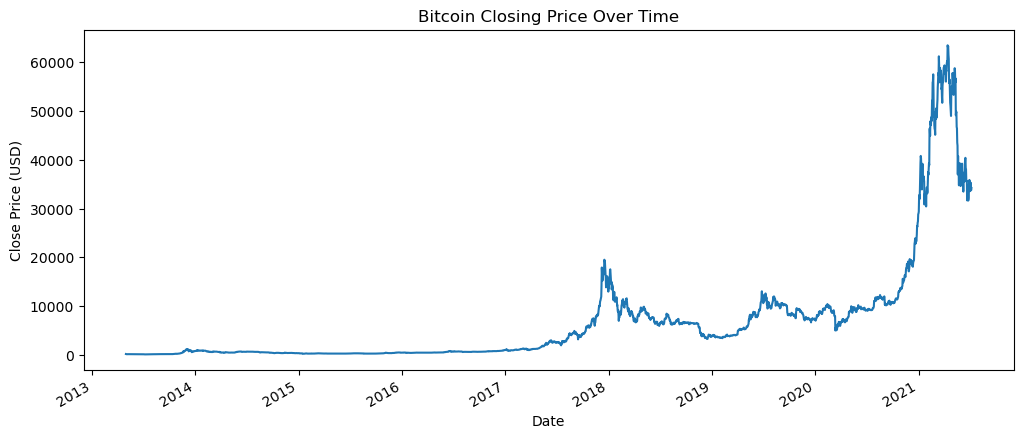

In [5]:
# Plot Close price
df['Close'].plot(figsize=(12, 5), title="Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

In [6]:
# 6. Preprocessing
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [7]:
# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
# 7. Build the LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\Balraj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 8. Train the Model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 8.4245e-04 - val_loss: 1.9227e-04
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.8713e-04 - val_loss: 1.8673e-04
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 1.6056e-04 - val_loss: 1.9965e-04
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 1.2334e-04 - val_loss: 1.9847e-04
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 1.4049e-04 - val_loss: 1.3087e-04
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 9.6057e-05 - val_loss: 1.1942e-04
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 1.1899e-04 - val_loss: 2.2727e-04
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 1.0178e-04 - val_loss: 2.3384e-04
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 8.8975e-05 - val_loss: 1.7817e-04
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.3787e-05 - val_loss: 9.8875e-05
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 7.4514

In [10]:
 #Make Predictions
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # fix shape

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [11]:
#Evaluate the Model
rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")

RMSE: 3372.94
MAE : 1920.05


C:\Users\Balraj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


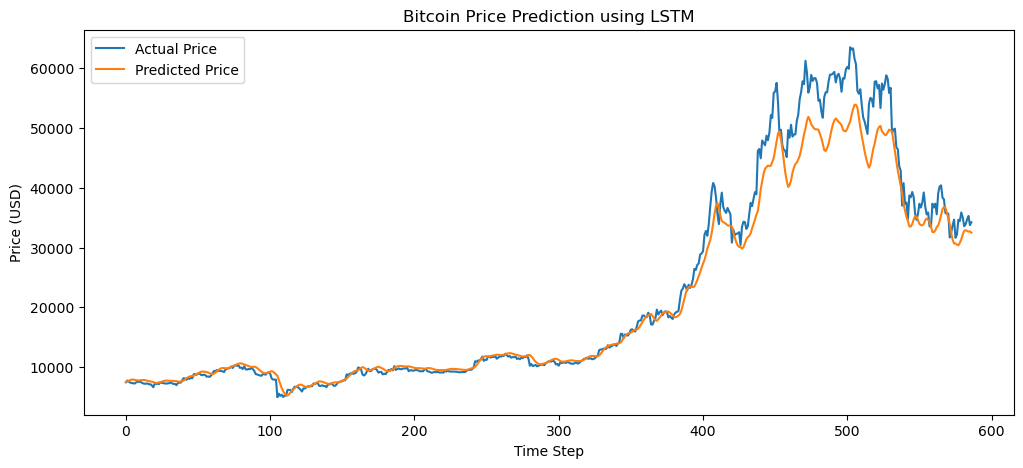

In [12]:
#  Plot Results
plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [13]:
# Save predictions and actual values to CSV for Power BI
import pandas as pd

# Create a DataFrame for output
prediction_df = pd.DataFrame({
    'Date': df.index[-len(actual):],  # align dates with test set
    'Actual_Price': actual.flatten(),
    'Predicted_Price': predicted.flatten()
})
# Save to CSV
prediction_df.to_csv("bitcoin_predictions.csv", index=False)
print("Prediction CSV saved successfully.")


Prediction CSV saved successfully.


In [14]:
# Save predictions to CSV
prediction_df.to_csv("bitcoin_predictions.csv", index=False)

In [15]:
import os
print(os.getcwd())

C:\Users\Balraj


In [16]:
# Save directly to Desktop
prediction_df.to_csv(r"C:\Users\Balraj\Desktop\bitcoin_predictions.csv", index=False)

In [17]:
# Predict Next 30 Days
future_days = 30
last_seq = data_scaled[-sequence_length:]  # last 60 days from original scaled data
future_preds = []

for _ in range(future_days):
    input_seq = last_seq.reshape(1, sequence_length, 1)
    pred = model.predict(input_seq, verbose=0)
    future_preds.append(pred[0][0])
    last_seq = np.append(last_seq, pred)[-sequence_length:]

In [18]:
# Inverse transform predictions
future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Create date index
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=future_days)

In [19]:

# Create future prediction DataFrame
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_prices.flatten()
})

In [20]:
# Save to CSV
future_df.to_csv("bitcoin_future_predictions.csv", index=False)

print("Future Predictions:")
print(future_df.head())

Future Predictions:
                 Date  Predicted_Close
0 2021-07-07 23:59:59     32311.867188
1 2021-07-08 23:59:59     31812.353516
2 2021-07-09 23:59:59     31170.441406
3 2021-07-10 23:59:59     30462.017578
4 2021-07-11 23:59:59     29736.271484


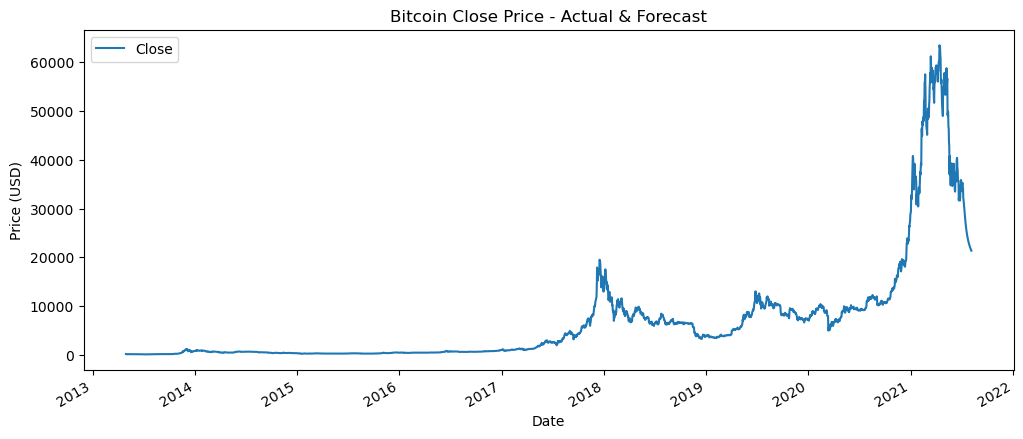

In [21]:
# Append future_df to original Close price series
combined_df = pd.concat([
    df[['Close']],
    future_df.set_index('Date').rename(columns={'Predicted_Close': 'Close'})
])

combined_df.plot(figsize=(12, 5), title="Bitcoin Close Price - Actual & Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [22]:
import pandas as pd

# Assuming `future_prices` and `future_dates` are already defined
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_prices.flatten()
})

# Save to CSV
future_df.to_csv("bitcoin_future_predictions.csv", index=False)

print("File saved as bitcoin_future_predictions.csv")


File saved as bitcoin_future_predictions.csv


In [23]:
future_df.to_csv("bitcoin_future_predictions.csv", index=False)

In [24]:
import os
print("Saving to:", os.getcwd())  # shows the current working directory

Saving to: C:\Users\Balraj


In [25]:
future_df.to_csv(r"C:\Users\Balraj\Desktop\bitcoin_future_predictions.csv", index=False)
